Here we benchmark the energy landscape visualisation tools for simple cases.

In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from VisualisationFunctions2 import *

Let's start with a 2-qubit system. The interaction strength is determined by the separation between the qubits.

In [2]:
n_qubits = 2

# Generate the qubit positions
posns = []
for i in range(n_qubits):
    
    posns.append([0,i])
    
posns = np.array(posns)

# Compute the Euclidean distance between them
separations = []
for i in range(len(posns)):
    for j in range(i,len(posns)):
        
        if i != j:
            
            sep = np.linalg.norm(posns[i] - posns[j])
            separations.append(sep)  
            
# Creates a list of lists, with each sublist containing the pairs of qubits that interact
qubits = []
for i in range(n_qubits):
    for j in range(i,n_qubits):
        
        if i != j:
            qubits.append([i,j])

# The coefficients of each qubit-qubit interaction, matching the pairings of the list 'qubits'
coefficients = [k for k in separations]

# Build the cost function
CostFn = BuildCostFn_Pyquil(qubits,coefficients)

Let's start with the simplest case, where there is only one QAOA step. Here, the application of the cost function unitary commutes with the evaluation of the cost function in the final state, so the only effect we expect to see is due to the single qubit rotations. Let's check this by varying one of the beta coefficients (which we expect to produce a change in the final cost function value) and one of the gamma coefficients (which should have no effect).

/home/ewan/RigettiCode/VisualisationFunctions2.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  cost[i,j] = EvaluateCostFunction(circuit,hamiltonian)


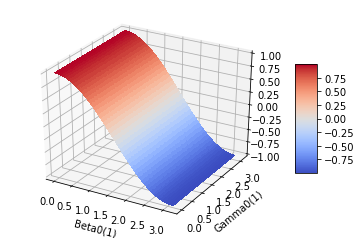

In [5]:
QAOA_p = 1

betas2var = [[0],[1]] # Varies the coefficient of qubit zero in the QAOA step p = 1
beta_range2var = [np.linspace(0,np.pi,100)] # The range of angles to give to the parameter being varied
betas = [0,0] # Fixes the other beta parameters & passes an arbitrary value 
                                         # for the parameter to be varied

# Same for gammas
gammas2var = [[0],[1]]
gamma_range2var = [np.linspace(0,np.pi,100)]
gammas = np.linspace(0,1,QAOA_p*len(coefficients))

params, param1, param2, param1_range, param2_range, param_labels = LandscapeParameters(n_qubits,qubits,coefficients,QAOA_p,
                                                                         betas2var,beta_range2var,betas,gammas2var,
                                                                         gamma_range2var,gammas)

PlotParametricCostFunction(params, param1, param2, param1_range, param2_range,param_labels,QAOA_p,
                          qubits,coefficients,n_qubits,CostFn,n_qubits)

As expected, as a function of the gamma parameter with fixed betas, there is no change in the cost function value. We also see a sinusoidal variation as a function of the beta parameter. Here, the initial state is both qubits in the state $|0\rangle$, and we have also set $\beta_1 = 0$, so that the other qubit remains in state $|0\rangle$ throughout. 

With $\beta_0 = 0$ the two qubits are aligned, and the cost function is $ZZ$, giving a value of +1. As we sweep through different values of $\beta_0$, we begin to anti-align the qubits, and eventually at $\beta_0 = \pi$, we have flipped the first qubit and the cost function value is -1.

Now let's do an example with the two beta coefficients being varied, both in the range $0$ to $\pi$. Note that since there is no coupling, the analysis of the results is trivial because the system evolves simply as a product state of the two qubits.

/home/ewan/RigettiCode/VisualisationFunctions2.py:246: ComplexWarning: Casting complex values to real discards the imaginary part
  cost[i,j] = EvaluateCostFunction(circuit,hamiltonian)


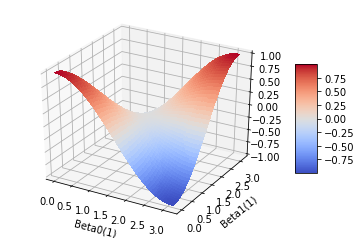

In [6]:
betas2var = [[0,1],[1,1]] # Varies the coefficient of qubits zero and one in the QAOA step p = 1
beta_range2var = [np.linspace(0,np.pi,100),np.linspace(0,np.pi,100)] # The range of angles to give to the parameter being varied
betas = [0,0] # Fixes the other beta parameters & passes an arbitrary value 
                                         # for the parameter to be varied

# Same for gammas
gammas2var = [[],[]]
gamma_range2var = []
gammas = np.linspace(0,1,QAOA_p*len(coefficients))

params, param1, param2, param1_range, param2_range, param_labels = LandscapeParameters(n_qubits,qubits,coefficients,QAOA_p,
                                                                         betas2var,beta_range2var,betas,gammas2var,
                                                                         gamma_range2var,gammas)

PlotParametricCostFunction(params, param1, param2, param1_range, param2_range,param_labels,QAOA_p,
                          qubits,coefficients,n_qubits,CostFn,n_qubits)

This is what we would expect the plot to look like. The cost function is highest when the two spins are aligned and are in the eigenstates of the Z operator, i.e. when the state is $|00\rangle$ or $|11\rangle$. The cost function is lowest when they are anti-aligned, i.e. when one of the betas is 0 and the other is $\pi$. When both are $pi/2$, the spins are in an eigenstate of the X operator, and have zero expectation value with respect to the $Z$ operator. 

Let's now look at the variance in the cost function for the last two cases considered above. First, the case of one beta and one gamma:

/home/ewan/RigettiCode/VisualisationFunctions2.py:310: ComplexWarning: Casting complex values to real discards the imaginary part
  variance[i,j] = EvaluateCostFunctionVariance(circuit,hamiltonian)


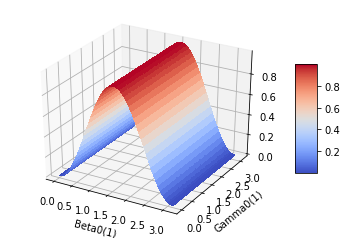

In [4]:
QAOA_p = 1

betas2var = [[0],[1]] # Varies the coefficient of qubit zero in the QAOA step p = 1
beta_range2var = [np.linspace(0,np.pi,100)] # The range of angles to give to the parameter being varied
betas = [0,0] # Fixes the other beta parameters & passes an arbitrary value 
                                         # for the parameter to be varied

# Same for gammas
gammas2var = [[0],[1]]
gamma_range2var = [np.linspace(0,np.pi,100)]
gammas = np.linspace(0,1,QAOA_p*len(coefficients))

params, param1, param2, param1_range, param2_range, param_labels = LandscapeParameters(n_qubits,qubits,coefficients,QAOA_p,
                                                                         betas2var,beta_range2var,betas,gammas2var,
                                                                         gamma_range2var,gammas)

variance = PlotParametricVariance(params, param1, param2, param1_range, param2_range,param_labels,QAOA_p,
                          qubits,coefficients,n_qubits,CostFn,n_qubits)

Recall the second qubit remains in the state $|0\rangle$ throughout here. For $\beta_0 = 0$ and $\beta_0 = \pi$, the first qubit is in an eigenstate of the $Z$ operator also, so the variance in the cost function for this simple case is then zero. 

For $\beta_0$ different from 0 or $\pi$, we get a non-zero variance. In partcicular, we expect the maximum value when the qubit is in the state $|+\rangle$, which occurs when $\beta_0 = \pi/2$. The value of the variance here is 

\begin{equation}
\langle +|Z^2|+\rangle - \langle +|Z|+\rangle ^2 = 1 - 0 = 1
\end{equation}

We can check the maximum value in the output variances. We don't quite get 1, because in the range of $\beta_0$ we have produced, we don't actually have $\pi/2$ exactly.

In [9]:
np.max(variance)

0.9997482711915928

Let's look at the two-qubit case now, where both $\beta_0$ and $\beta_1$ are varied. We expect zero variance for the angle pairs $(\beta_0,\beta_1) = (0,0),(0,\pi),(\pi,0), (\pi,\pi)$. We also expect a variance of 1 at $(\pi/2,\pi/2)$.

In fact, we should expect the variance to be equal to 1 whenever either (or both) of the qubits are in the state $|+\rangle$. For example, suppose the first qubit is in $|+\rangle$ and the other qubit is in an arbitrary state $|\psi\rangle$. Then

\begin{eqnarray}
&& \langle +|Z^2|+\rangle\langle \psi|Z^2|\psi\rangle - \langle +|Z|+\rangle ^2 \langle \psi|Z|\psi\rangle ^2 \\
&=& \langle +|+\rangle\langle \psi|\psi\rangle - 0\times\langle \psi|Z|\psi\rangle ^2 \\ 
&=& 1
\end{eqnarray}

Below we see the plot looks as expected.

/home/ewan/RigettiCode/VisualisationFunctions2.py:310: ComplexWarning: Casting complex values to real discards the imaginary part
  variance[i,j] = EvaluateCostFunctionVariance(circuit,hamiltonian)


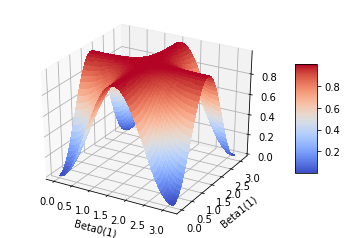

In [12]:
betas2var = [[0,1],[1,1]] # Varies the coefficient of qubits zero and one in the QAOA step p = 1
beta_range2var = [np.linspace(0,np.pi,100),np.linspace(0,np.pi,100)] # The range of angles to give to the parameter being varied
betas = [0,0] # Fixes the other beta parameters & passes an arbitrary value 
                                         # for the parameter to be varied

# Same for gammas
gammas2var = [[],[]]
gamma_range2var = []
gammas = np.linspace(0,1,QAOA_p*len(coefficients))

params, param1, param2, param1_range, param2_range, param_labels = LandscapeParameters(n_qubits,qubits,coefficients,QAOA_p,
                                                                         betas2var,beta_range2var,betas,gammas2var,
                                                                         gamma_range2var,gammas)

variance = PlotParametricVariance(params, param1, param2, param1_range, param2_range,param_labels,QAOA_p,
                          qubits,coefficients,n_qubits,CostFn,n_qubits)

In order to see the effect of varying a gamma coefficient, we need to have at least $p=2$ QAOA steps. The final application of the cost unitary and the evaluation of the cost function at the end always commute, so there is no change in the cost function value from the application of the cost unitary at step $p$. (Note that this shows that the minimum cost function solution space is highly degenerate - it is invariant up to the application of any arbitrary combination of Z operators).

Let's again vary the beta coefficient of the first qubit in the first QAOA step ($p=1$), and also now the gamma coefficient of the interaction Hamiltonian between the qubits. Note we must set the betas in the second step to be non-zero, otherwise the application of the cost unitaty in the first step also then commutes with the computation of the cost function at the end.

/home/ewan/RigettiCode/VisualisationFunctions2.py:257: ComplexWarning: Casting complex values to real discards the imaginary part
  cost[i,j] = EvaluateCostFunction(circuit,hamiltonian)


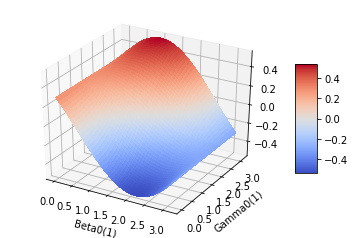

In [3]:
QAOA_p = 2

betas2var = [[0],[1]] # Varies the coefficient of qubit zero in the QAOA step p = 1
beta_range2var = [np.linspace(0,np.pi,100)] # The range of angles to give to the parameter being varied
betas = [0,0,1,1] # Fixes the other beta parameters & passes an arbitrary value 
                                         # for the parameter to be varied

# Same for gammas
gammas2var = [[0],[1]]
gamma_range2var = [np.linspace(0,np.pi,100)]
gammas = np.linspace(0,1,QAOA_p*len(coefficients))

params, param1, param2, param1_range, param2_range, param_labels = LandscapeParameters(n_qubits,qubits,coefficients,QAOA_p,
                                                                         betas2var,beta_range2var,betas,gammas2var,
                                                                         gamma_range2var,gammas)

cost = PlotParametricCostFunction(params, param1, param2, param1_range, param2_range,param_labels,QAOA_p,
                         qubits,coefficients,n_qubits,CostFn,n_qubits)

Now we see that the value of the cost function is a non-trivial function of $\gamma_0$. Let's look at the limits to see if this makes sense:

- For $\gamma_0 = 0$, we have no cost unitary in the first step, and in the second step the application of the cost unitary does not change the final cost function value. What we have is then simply the effect of varying the angle of rotation of the first qubit in the first step, given that in the second step the two qubits are rotated through the same angle (here set to be 1). 

- For $\beta_0 = 0$, we do nothing in the first QAOA step, and in the second step we have an identical rotation on the two qubits, which also does not change the cost function. Varying the value of $\gamma_0$ should therefore produce no change in the cost function value.

Both of these points are seen in the slice plots below.

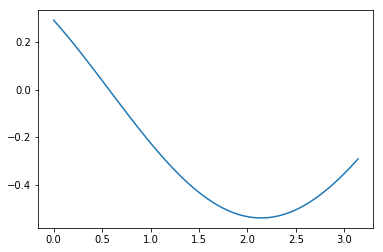

In [5]:
# Plot the cost function for gamma0 = 0 as a function of beta0
plt.plot(np.linspace(0,np.pi,100),cost[:,0])
plt.show()

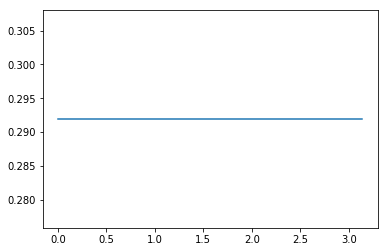

In [6]:
# Plot the cost function for beta0 = 0 as a function of gamma0
plt.plot(np.linspace(0,np.pi,100),cost[0,:])
plt.show()

For $\beta_0$ different from 0 or $\pi$, we create a superposition of $|0\rangle$ and $|1\rangle$ in the first qubit. What happens then as a function of $\gamma_0$? On the Bloch sphere of the qubit in question, the Bloch vector then precesses around the x-axis at whatever latitude it finds itself. The second application of the mixer Hamiltonian then applies a rotation of the Bloch vector of each qubit about the X axis. 

For the second qubit, which has remained in the state $|0\rangle$, this simply lifts it towards the state $|1\rangle$, and its Bloch vector precesses at the maximum distance from the X-axis. However, the Bloch vector of the first qubit has been rotated by the cost function about the Z axis, so on application of the second mixer term, it will precess at a potentially smaller distance from the X axis - in other words, the crucial point is that the two qubits have a Bloch vector with different longitudes just before the final rotation about the X axis. This means their alignment along Z will strongly depend on just how much their longitudinal coordinates differ (i.e. for how long the cost Hamiltonian was applied).

When the cost Hamiltonian is applied for zero time, the subsequent mixer unitary means that both qubits precess about X with the same longitudinal vector, and they will precess 'in phase'. When the cost Hamiltonian is applied for a time of $\pi$, the Bloch vector of the first qubit is flipped to the other side of the Bloch sphere, and the subsequent evolution under the mixer causes them to Rabi oscillate about the X axis out of phase with one another.

The plot below shows the case when the first qubit is rotated close to the equator of the Bloch sphere first. 

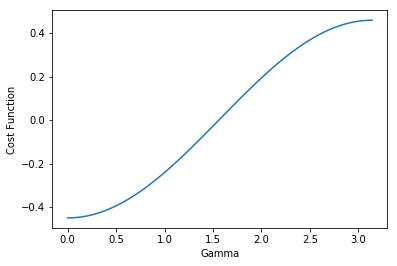

In [4]:
# Plot the cost function for beta0 = 0 as a function of gamma0
plt.plot(np.linspace(0,np.pi,100),cost[49,:])
plt.xlabel('Gamma')
plt.ylabel('Cost Function')
plt.show()

In [ ]:
# TODO: run profiler on the code - probably have a lot of redundancy in building the Hamiltonian etc.

/home/ewan/RigettiCode/VisualisationFunctions2.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  cost[i,j] = EvaluateCostFunction(circuit,hamiltonian)


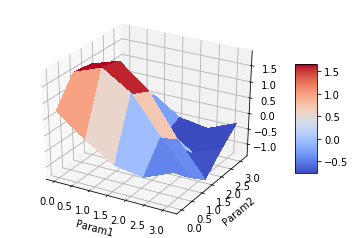

In [3]:
n_qubits = 3
n_gammas = 3
QAOA_p = 3

betas2var = [[2],[2]]
beta_range2var = [np.linspace(0,np.pi,5)]
betas = np.linspace(0,1,n_qubits*QAOA_p)

gammas2var = [[1],[2]]
gamma_range2var = [np.linspace(0,np.pi,5)]
gammas = np.linspace(0,1,QAOA_p*n_gammas)

params, param1, param2, param1_range, param2_range = LandscapeParameters(n_qubits,qubits,coefficients,QAOA_p,
                                                                         betas2var,beta_range2var,betas,gammas2var,
                                                                         gamma_range2var,gammas)

#cost = PlotParametricCostFunction(n_qubits,qubits,coefficients,CostFn,QAOA_p,betas2var,beta_range2var,
#                           betas,gammas2var,gamma_range2var,gammas)

cost = PlotParametricCostFunction(params, param1, param2, param1_range, param2_range,QAOA_p,
                           qubits,coefficients,n_qubits,CostFn,n_qubits)

In [4]:
Operators_Dict = BuildPauliOps(n_qubits,qubits)

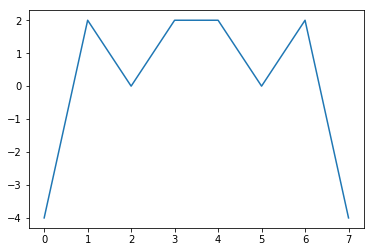

In [5]:
PlotBareCostFunction(n_qubits, Operators_Dict, coefficients)

/home/ewan/anaconda3/lib/python3.7/site-packages/pyquil/paulis.py:707: UserWarning: The term Z2Z1 will be combined with Z1Z2, but they have different orders of operations. This doesn't matter for QVM or wavefunction simulation but may be important when running on an actual device.
  .format(t.id(sort_ops=False), first_term.id(sort_ops=False)))
/home/ewan/anaconda3/lib/python3.7/site-packages/pyquil/paulis.py:707: UserWarning: The term Z2Z0 will be combined with Z0Z2, but they have different orders of operations. This doesn't matter for QVM or wavefunction simulation but may be important when running on an actual device.
  .format(t.id(sort_ops=False), first_term.id(sort_ops=False)))
/home/ewan/anaconda3/lib/python3.7/site-packages/pyquil/paulis.py:707: UserWarning: The term Z1Z0 will be combined with Z0Z1, but they have different orders of operations. This doesn't matter for QVM or wavefunction simulation but may be important when running on an actual device.
  .format(t.id(sort_ops=Fa

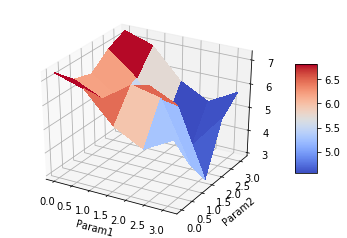

In [4]:
variance = PlotParametricVariance(params, param1, param2, param1_range, param2_range,QAOA_p,
                           qubits,coefficients,n_qubits,CostFn,n_qubits)